### Day36.YOLO 細節理解-網絡架構      
用實際的影像，嘗試自己搭建一個 1乘1和 3乘 3的模型    
看通過 1乘1和 3乘3 卷積層後會有甚麼變化?     
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化     

In [7]:
#宣告
# 載入套件
import cv2
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.models import Sequential 
from keras.layers.core import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D


圖片高度: 576
圖片寬度: 768
RGB維度: 3


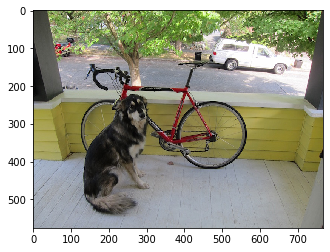

In [8]:
##讀入照片
# 下載圖片範例，如果已經下載過就可以註解掉
# !wget https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true -O dog.jpg
image=cv2.imread('data/dog.jpg')
#ax.imshow(image)
print("圖片高度:",image.shape[0])
print("圖片寬度:",image.shape[1])
print("RGB維度:",image.shape[2])

def show(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # plt.imshow 預設圖片是 rgb 的
    plt.show()
show(image)
#------------------------------------------------------------------------------------------------
#cv2.cvtColor:轉換顏色空間
#cv2.COLOR_BGR2RGB:BGR轉換成RGB

In [9]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model=Sequential()
model.add(Conv2D(3,
                 (1,1),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
#--------------------------------------------------------------------------------------------------------------------
"""
filters(過濾器)-輸出空間的尺寸:3
kernel_size-2D卷積窗口的寬度和高度:(1,1)
padding="same"
data_format='channels_last' 尺寸為 (batch, rows, cols, channels)
activation(激活函數):'relu'
input_shape(輸入尺寸):image.shape
"""
#作業: 接續搭建一個 4 個 3*3 的 filters 
model.add(Conv2D(4,
                 (3,3),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))

print(model.summary())
#權重都是亂數值

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 576, 768, 4)       112       
Total params: 124
Trainable params: 124
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# keras 在讀取檔案實是以 batch 的方式一次讀取多張，
#但我們這裡只需要判讀一張，
#所以透過 expand_dims() 函式來多擴張一個維度
image_batch=np.expand_dims(image,axis=0) #np.expand_dims:用於擴充套件陣列的形狀
print(image_batch.shape)
print()
print("圖片高度:",image_batch.shape[1])
print("圖片寬度:",image_batch.shape[2])
print("RGB維度:",image_batch.shape[3])

(1, 576, 768, 3)

圖片高度: 576
圖片寬度: 768
RGB維度: 3


# GPU設定

In [11]:
#載入套件
import os
import tensorflow as tf
# 使用第一張 GPU 卡
os.environ["CUDA_VISIBLE_DEVICES"] = " 0 "
# 只使用 60% 的 GPU 記憶體
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.6)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tf.__version__

'1.13.1'

# 確認GPU運行

In [12]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(576, 768, 4)


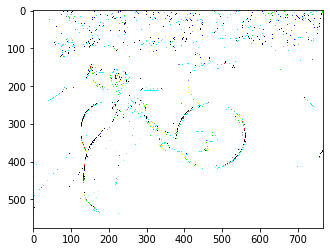

In [13]:
#model.predict() 函式，得到回傳便是 feature map
image_conv=model.predict(image_batch)
img=np.squeeze(image_conv,axis=0) #np.squeeze():從數組的形狀中刪除單維度條目，即把shape中為1的維度去掉
print(img.shape)
plt.imshow(img)

#### 由於權重都是亂數值，所以每次跑出來的結果不同
大家可以自己嘗試著搭建不同層數後，觀察圖形特徵的變化

# 1*1卷積層

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 576, 768, 3)       12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
None
(1, 576, 768, 3)

圖片高度: 576
圖片寬度: 768
RGB維度: 3
(576, 768, 3)


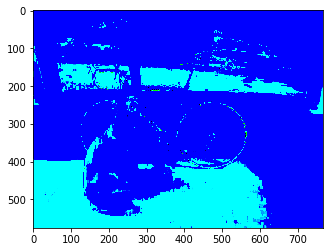

In [14]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model=Sequential()
model.add(Conv2D(3,
                 (1,1),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
print(model.summary())
#權重都是亂數值
#-------------------------------------------------------------------------------------------------------------------------
# keras 在讀取檔案實是以 batch 的方式一次讀取多張，
#但我們這裡只需要判讀一張，
#所以透過 expand_dims() 函式來多擴張一個維度
image_batch=np.expand_dims(image,axis=0) #np.expand_dims:用於擴充套件陣列的形狀
print(image_batch.shape)
print()
print("圖片高度:",image_batch.shape[1])
print("圖片寬度:",image_batch.shape[2])
print("RGB維度:",image_batch.shape[3])
#-------------------------------------------------------------------------------------------------------------------------
#model.predict() 函式，得到回傳便是 feature map
image_conv=model.predict(image_batch)
img=np.squeeze(image_conv,axis=0) #np.squeeze():從數組的形狀中刪除單維度條目，即把shape中為1的維度去掉
print(img.shape)
plt.imshow(img)

# 1*1卷積層 + 4*4 卷積層 +1*1卷積層

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 576, 768, 4)       112       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 576, 768, 3)       15        
Total params: 139
Trainable params: 139
Non-trainable params: 0
_________________________________________________________________
None
(1, 576, 768, 3)

圖片高度: 576
圖片寬度: 768
RGB維度: 3
(576, 768, 3)


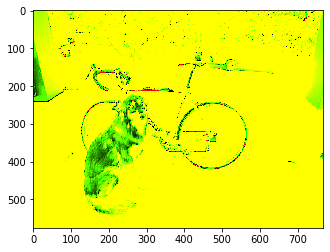

In [16]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model=Sequential()
model.add(Conv2D(3,
                 (1,1),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
model.add(Conv2D(4,
                 (3,3),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
model.add(Conv2D(3,
                 (1,1),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))

print(model.summary())
#權重都是亂數值
#-------------------------------------------------------------------------------------------------------------------------
# keras 在讀取檔案實是以 batch 的方式一次讀取多張，
#但我們這裡只需要判讀一張，
#所以透過 expand_dims() 函式來多擴張一個維度
image_batch=np.expand_dims(image,axis=0) #np.expand_dims:用於擴充套件陣列的形狀
print(image_batch.shape)
print()
print("圖片高度:",image_batch.shape[1])
print("圖片寬度:",image_batch.shape[2])
print("RGB維度:",image_batch.shape[3])
#-------------------------------------------------------------------------------------------------------------------------
#model.predict() 函式，得到回傳便是 feature map
image_conv=model.predict(image_batch)
img=np.squeeze(image_conv,axis=0) #np.squeeze():從數組的形狀中刪除單維度條目，即把shape中為1的維度去掉
print(img.shape)
plt.imshow(img)

# # 1*1卷積層 + 4*4 卷積層 +1*1卷積層 + 4*4卷積層

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 576, 768, 3)       12        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 576, 768, 4)       112       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 576, 768, 3)       15        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 576, 768, 4)       112       
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None
(1, 576, 768, 3)

圖片高度: 576
圖片寬度: 768
RGB維度: 3
(576, 768, 4)


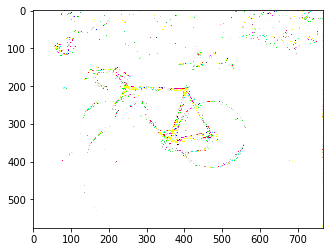

In [18]:
# create model
#Sequential 是一個多層模型
#透過 add() 函式將一層一層 layer 加上去
#data_format='channels_last' 尺寸为 (batch, rows, cols, channels)
#搭建一個 3 個 1*1 的 filters
model=Sequential()
model.add(Conv2D(3,
                 (1,1),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
model.add(Conv2D(4,
                 (3,3),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
model.add(Conv2D(3,
                 (1,1),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))
model.add(Conv2D(4,
                 (3,3),
          padding="same",
         data_format='channels_last',
         activation='relu',
         input_shape=image.shape))

print(model.summary())
#權重都是亂數值
#-------------------------------------------------------------------------------------------------------------------------
# keras 在讀取檔案實是以 batch 的方式一次讀取多張，
#但我們這裡只需要判讀一張，
#所以透過 expand_dims() 函式來多擴張一個維度
image_batch=np.expand_dims(image,axis=0) #np.expand_dims:用於擴充套件陣列的形狀
print(image_batch.shape)
print()
print("圖片高度:",image_batch.shape[1])
print("圖片寬度:",image_batch.shape[2])
print("RGB維度:",image_batch.shape[3])
#-------------------------------------------------------------------------------------------------------------------------
#model.predict() 函式，得到回傳便是 feature map
image_conv=model.predict(image_batch)
img=np.squeeze(image_conv,axis=0) #np.squeeze():從數組的形狀中刪除單維度條目，即把shape中為1的維度去掉
print(img.shape)
plt.imshow(img)